In [1]:
import pandas as pd
import numpy as np
cars = pd.read_csv('imports-85.data')

In [2]:
print(cars.columns.values.tolist())
cars.shape

['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd', 'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four', '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27', '13495']


(204, 26)

In [3]:
# the column names are not in the right spots
# let's try to take a look a the head of the dataset
print(cars.head(5))

   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.60  ...    \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front   88.6  ...     
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front   94.5  ...     
2  2  164         audi  gas  std  four        sedan  fwd  front   99.8  ...     
3  2  164         audi  gas  std  four        sedan  4wd  front   99.4  ...     
4  2    ?         audi  gas  std   two        sedan  fwd  front   99.8  ...     

   130  mpfi  3.47  2.68  9.00  111  5000  21  27  13495  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
3  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  
4  136  mpfi  3.19  3.40   8.5  110  5500  19  25  15250  

[5 rows x 26 columns]


In [4]:
# it seems they are missing from the dataset
# luckily we can get it from:
# https://archive.ics.uci.edu/ml/datasets/automobile
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [5]:
# much better!
# we still have some issue with these data
# specifically with the 'normalized-losses' column that is full of '?'
# let's change these '?' with a customary NaN
cars = cars.replace('?', np.NaN)

In [6]:
# now we select just the numeric columns, with continuous values
nr_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
nr_cars = cars[nr_cols]
nr_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# then we check the the amount and the location of the null data
nr_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# we have just numeric values, so we can all convert them into float
nr_cars = nr_cars.astype('float')
# there are 4 missing prices, so we drop their rows
nr_cars = nr_cars.dropna(subset=['price'])
# updated situation of the missing values
nr_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# the column 'normalized-losses' has too many
# missing values so we drop the whole column
nr_cars = nr_cars.drop('normalized-losses', 1)
# for the remaining missing data. we decide to use the mean
nr_cars = nr_cars.fillna(nr_cars.mean())
# we shouldn't have missing data now
# updated situation of the missing values
nr_cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [10]:
# normalize the values so we'll have numbers among 0 and 1
# clearly we won't normalize the 'price' column
price = nr_cars['price']
nr_cars = (nr_cars - nr_cars.min())/(nr_cars.max() - nr_cars.min())
nr_cars['price'] = price
nr_cars.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_cols, target_cols, df):
    # we want to randomize the order of the rows of our dataset
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    # we start instantiating KNeighborsRegressor to knn
    knn = KNeighborsRegressor()
    # we'll share our dataset in two halfs
    middle_index = int(len(random_df) / 2)
    train_df = random_df.iloc[0:middle_index]
    test_df = random_df.iloc[middle_index:]
    # fit the model
    knn.fit(train_df[[train_cols]], train_df[target_cols])
    # make predictions
    predictions = knn.predict(test_df[[train_cols]])
    # calculate rmse and return it
    mse = mean_squared_error(test_df[target_cols], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse = {}
train_cols = nr_cars.columns.drop('price')
# for every columns, call the function knn_train_test
# to check the rmse value
# we are looking for the maximum
for i in train_cols:
    rmse[i] = knn_train_test(i, 'price', nr_cars)
# let's take a look at the rmse for each column        
sorted(rmse.items(), key=lambda x:x[1])

[('horsepower', 4037.0377131537603),
 ('curb-weight', 4401.1182547931239),
 ('highway-mpg', 4630.0267985880564),
 ('width', 4704.4825897043856),
 ('city-mpg', 4766.4225050901341),
 ('length', 5427.2009608367125),
 ('wheel-base', 5461.5539978730567),
 ('compression-rate', 6610.8121531591287),
 ('bore', 6780.6277846859757),
 ('peak-rpm', 7697.4596964334805),
 ('stroke', 8006.5295446471009),
 ('height', 8144.4410426637469)]

In [14]:
# modify the knn_train_test() function to accept
# a parameter for the k value
# the values we use are: 1, 3, 5
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    # we'll share our dataset in two halfs
    middle_index = int(len(random_df) / 2)
    train_df = random_df.iloc[0:middle_index]
    test_df = random_df.iloc[middle_index:]
    k_values = [1,3,5,7,9]
    k_rmse_dict = {}
    for k in k_values:
        # fit the model
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        # make the predictions
        predicted_labels = knn.predict(test_df[[train_col]])
        # using RMSE, calculate and return rmse
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse) 
        k_rmse_dict[k] = rmse
    return k_rmse_dict

k_rmse_results = {}
train_cols = nr_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', nr_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6780.6277846859757,
  7: 6878.0979659215318,
  9: 6866.8085020384133},
 'city-mpg': {1: 5901.1435743547636,
  3: 4646.7464087271546,
  5: 4766.4225050901341,
  7: 5232.5230341673159,
  9: 5465.2094925275333},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6081044180528,
  9: 4632.0444744544011},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8144.4410426637469,
  7: 7679.5981243937731,
  9: 7811.0360629122297},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4617.3050197885541,
  5: 4630.0267985880564,
  7: 4796.0614401869461,
  9: 5278.3580569539872},
 'horsepower': {1: 4170.0548480378011,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.8118602771337,
  9: 4515.1356174191033},
 'length': {1: 4628.45550

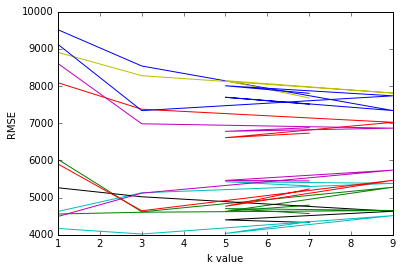

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


In [16]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower          4219.377860
width               4618.910560
curb-weight         4730.075815
highway-mpg         5069.469256
length              5176.394904
city-mpg            5202.409003
wheel-base          5252.392462
compression-rate    7166.073599
bore                7222.472445
stroke              8000.240467
peak-rpm            8119.365233
height              8163.346266
dtype: float64

In [18]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', nr_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', nr_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', nr_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', nr_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', nr_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.2611882141268},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}